In [154]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mcolors


# from analysis_plot_kit.core import fig_generator
from psPlotKit.data_plotter.fig_generator import figureGenerator

In [155]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["mathtext.fontset"] = "custom"
# plt.rcParams['font.size'] = 18
text_size_default = 18

In [156]:
data_HPRO_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_sea_2D.csv')
data_HPRO_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_nacl_2D.csv')
data_HPRO_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_simple_2D.csv')
data_HPRO_reaktoro = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_reaktoro_2D.csv')

In [157]:
# find errors and create dataframe
results_col = ["LCOW","SEC", "Membrane Area" , "Operating Pressure"] 
error_sea_HPRO = pd.DataFrame()
error_nacl_HPRO = pd.DataFrame()
error_simple_HPRO = pd.DataFrame()

for i in results_col:
    error_sea_HPRO[i] = pd.DataFrame((data_HPRO_reaktoro[i] - data_HPRO_seawater[i]) / data_HPRO_reaktoro[i]) * 100
    error_nacl_HPRO[i] = pd.DataFrame((data_HPRO_reaktoro[i] - data_HPRO_nacl[i]) / data_HPRO_reaktoro[i]) * 100
    error_simple_HPRO[i] = pd.DataFrame((data_HPRO_reaktoro[i] - data_HPRO_simple[i]) / data_HPRO_reaktoro[i]) * 100

In [158]:
# Sea errors
for i in results_col:
    print(i)
    print(np.mean(error_sea_HPRO[i]))

# NaCl errors
for i in results_col:
    print(i)
    print(np.mean(error_nacl_HPRO[i]))

LCOW
0.8456691417061482
SEC
1.348084397305983
Membrane Area
2.2402282347492783
Operating Pressure
1.1878901583787833
LCOW
-3.892180185189347
SEC
-4.404504003486304
Membrane Area
2.0929844640482207
Operating Pressure
-4.311273264182707


In [159]:

xticks = ([5, 10, 20, 35, 40, 50,])
yticks = ([35,40,45,50,55,60,65,])

In [160]:
# figure.set_default_figure_settings(font_size=text_size_default-2, label_size=text_size_default)

(42,)
[ 5. 10. 20. 35. 40. 50.] [35. 40. 45. 50. 55. 60. 65.]
[0] [0] 21.29379 5.0 35.0
[0] [1] 22.40615 5.0 40.0
[0] [2] 23.46102 5.0 45.0
[0] [3] 24.47922 5.0 50.0
[0] [4] 25.48207 5.0 55.00000000000001
[0] [5] 26.49475 5.0 60.0
[0] [6] 27.55197 5.0 65.0
[1] [0] 26.1806 10.0 35.0
[1] [1] 27.56476 10.0 40.0
[1] [2] 28.93221 10.0 45.0
[1] [3] 30.3188 10.0 50.0
[1] [4] 31.7692 10.0 55.00000000000001
[1] [5] 33.34718 10.0 60.0
[1] [6] 35.15565 10.0 65.0
[2] [0] 36.38252 20.0 35.0
[2] [1] 38.42953 20.0 40.0
[2] [2] 40.58606 20.0 45.0
[2] [3] 42.93927 20.0 50.0
[2] [4] 45.61404 20.0 55.00000000000001
[2] [5] 48.80398 20.0 60.0
[2] [6] 52.82789 20.0 65.0
[3] [0] 52.97662 35.0 35.0
[3] [1] 56.30887 35.0 40.0
[3] [2] 60.03276 35.0 45.0
[3] [3] 64.34355 35.0 50.0
[3] [4] 69.52299 35.0 55.00000000000001
[3] [5] 75.99378 35.0 60.0
[3] [6] 84.41125 35.0 65.0
[4] [0] 58.88514 40.0 35.0
[4] [1] 62.72003 40.0 40.0
[4] [2] 67.05973 40.0 45.0
[4] [3] 72.1392 40.0 50.0
[4] [4] 78.29556 40.0 55.00000000

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_7648\3170940584.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


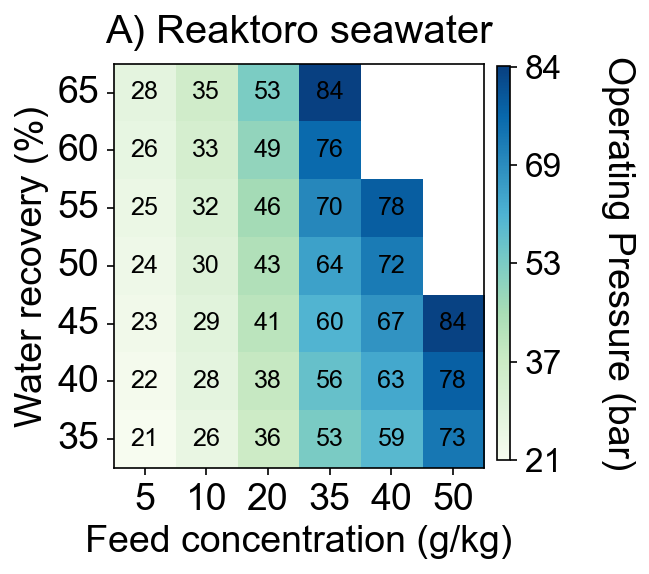

In [161]:
# data_HPRO_reaktoro = data_HPRO_reaktoro.dropna()

vmin = np.min(data_HPRO_reaktoro["Operating Pressure"])/1e5
vmax = np.max(data_HPRO_reaktoro["Operating Pressure"])/1e5

zticks = np.linspace(vmin, vmax, 5) 
zticks = np.around(zticks, decimals=1)
figure = figureGenerator()

figure.init_figure(width=3.5, height=3.5)
figure.set_default_figure_settings(font_size=text_size_default-2, label_size=text_size_default)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")

figure.set_title("A) Reaktoro seawater", pad=10)
figure.plot_map(
    xdata=data_HPRO_reaktoro["# Feed Mass Frac"]*1000,
    ydata=data_HPRO_reaktoro["Water Recovery"]*100,
    zdata=data_HPRO_reaktoro["Operating Pressure"]/1e5,
    text=True,
    textfontsize= 12,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Operating Pressure (bar)", zlabelpad=35)
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=0,
    yformat=0,
    xlabel="Feed concentration (g/kg)",
    ylabel="Water recovery (%)",
    fontsize=text_size_default
)

figure.save_fig(name="plot_reaktoro_op_p_RO")

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_7648\1342814448.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(42,)
[ 5. 10. 20. 35. 40. 50.] [35. 40. 45. 50. 55. 60. 65.]
[0] [0] 0.3698786 5.0 35.0
[0] [1] 0.3433389 5.0 40.0
[0] [2] 0.3218547 5.0 45.0
[0] [3] 0.3041474 5.0 50.0
[0] [4] 0.2893972 5.0 55.00000000000001
[0] [5] 0.2770797 5.0 60.0
[0] [6] 0.2668908 5.0 65.0
[1] [0] 0.4359816 10.0 35.0
[1] [1] 0.4044052 10.0 40.0
[1] [2] 0.3794139 10.0 45.0
[1] [3] 0.3593981 10.0 50.0
[1] [4] 0.3433874 10.0 55.00000000000001
[1] [5] 0.330856 10.0 60.0
[1] [6] 0.321674 10.0 65.0
[2] [0] 0.5741953 20.0 35.0
[2] [1] 0.5330344 20.0 40.0
[2] [2] 0.5018071 20.0 45.0
[2] [3] 0.4783308 20.0 50.0
[2] [4] 0.461493 20.0 55.00000000000001
[2] [5] 0.4510379 20.0 60.0
[2] [6] 0.4476508 20.0 65.0
[3] [0] 0.8002379 35.0 35.0
[3] [1] 0.745711 35.0 40.0
[3] [2] 0.70692 35.0 45.0
[3] [3] 0.6809725 35.0 50.0
[3] [4] 0.6667982 35.0 55.00000000000001
[3] [5] 0.6649127 35.0 60.0
[3] [6] 0.6776879 35.0 65.0
[4] [0] 0.8812306 40.0 35.0
[4] [1] 0.822485 40.0 40.0
[4] [2] 0.7816109 40.0 45.0
[4] [3] 0.7554975 40.0 50.0
[4] 

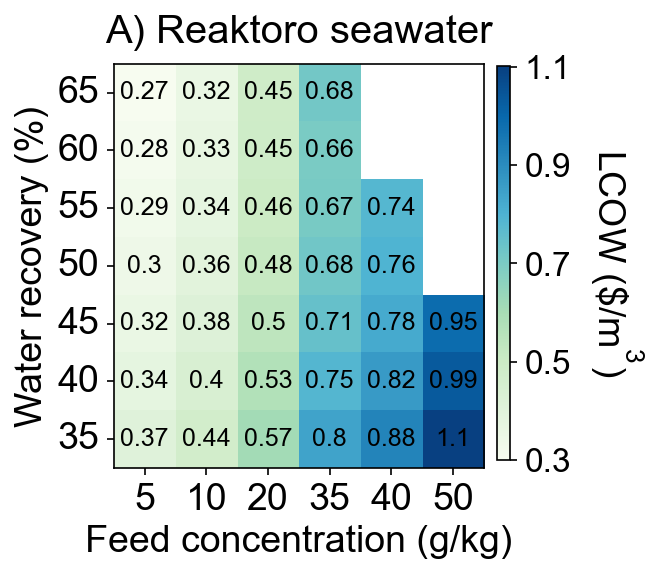

In [162]:

vmin = np.min(data_HPRO_reaktoro["LCOW"])
vmax = np.max(data_HPRO_reaktoro["LCOW"])

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=3)
figure = figureGenerator()
figure.init_figure(width=3.5, height=3.5)
figure.set_default_figure_settings(font_size=text_size_default-2, label_size=text_size_default)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")

figure.set_title("A) Reaktoro seawater",pad=10)
figure.plot_map(
    xdata=data_HPRO_reaktoro["# Feed Mass Frac"] *1000,
    ydata=data_HPRO_reaktoro["Water Recovery"]*100,
    zdata=data_HPRO_reaktoro["LCOW"],
    text=True,
    textfontsize= 12,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=1, zlabel="LCOW ($\$$/m$^3$)", zlabelpad=35)
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Feed concentration (g/kg)",
    ylabel="Water recovery (%)",
    fontsize=text_size_default
)

figure.save_fig(name="plot_reaktoro_LCOW_RO")

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_7648\4271342517.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(42,)
[ 5. 10. 20. 35. 40. 50.] [35. 40. 45. 50. 55. 60. 65.]
[0] [0] 2.014936 5.0 35.0
[0] [1] 1.859771 5.0 40.0
[0] [2] 1.734644 5.0 45.0
[0] [3] 1.631992 5.0 50.0
[0] [4] 1.547034 5.0 55.00000000000001
[0] [5] 1.476804 5.0 60.0
[0] [6] 1.419761 5.0 65.0
[1] [0] 2.504229 10.0 35.0
[1] [1] 2.311714 10.0 40.0
[1] [2] 2.160685 10.0 45.0
[1] [3] 2.041194 10.0 50.0
[1] [4] 1.947469 10.0 55.00000000000001
[1] [5] 1.876768 10.0 60.0
[1] [6] 1.829293 10.0 65.0
[2] [0] 3.530302 20.0 35.0
[2] [1] 3.267794 20.0 40.0
[2] [2] 3.072119 20.0 45.0
[2] [3] 2.92932 20.0 50.0
[2] [4] 2.832906 20.0 55.00000000000001
[2] [5] 2.782552 20.0 60.0
[2] [6] 2.784762 20.0 65.0
[3] [0] 5.212006 35.0 35.0
[3] [1] 4.852957 35.0 40.0
[3] [2] 4.604245 35.0 45.0
[3] [3] 4.446473 35.0 50.0
[3] [4] 4.372822 35.0 55.00000000000001
[3] [5] 4.386988 35.0 60.0
[3] [6] 4.504084 35.0 65.0
[4] [0] 5.81445 40.0 35.0
[4] [1] 5.424779 40.0 40.0
[4] [2] 5.161141 40.0 45.0
[4] [3] 5.002248 40.0 50.0
[4] [4] 4.941082 40.0 55.000000

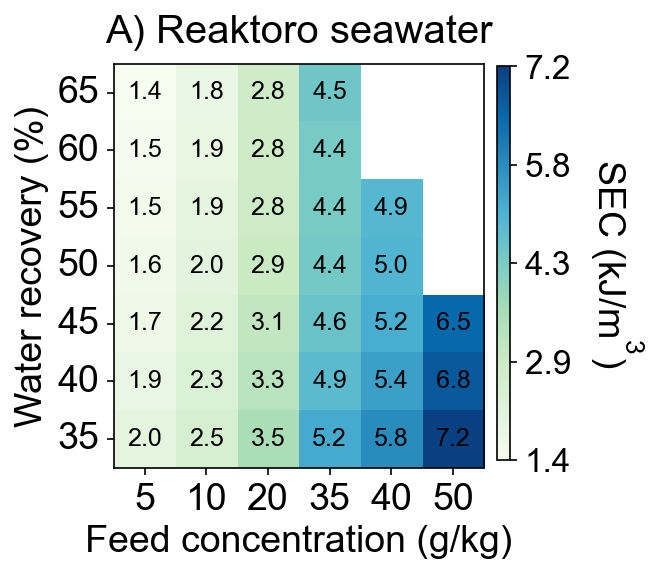

In [163]:
vmin = np.min(data_HPRO_reaktoro["SEC"])
vmax = np.max(data_HPRO_reaktoro["SEC"])

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=3)
figure = figureGenerator()
figure.init_figure(width=3.5, height=3.5)
figure.set_default_figure_settings(font_size=text_size_default-2, label_size=text_size_default)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")

figure.set_title("A) Reaktoro seawater",pad=10)
figure.plot_map(
    xdata=data_HPRO_reaktoro["# Feed Mass Frac"] *1000,
    ydata=data_HPRO_reaktoro["Water Recovery"]*100,
    zdata=data_HPRO_reaktoro["SEC"],
    text=True,
    textfontsize= 12,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=1, zlabel="SEC (kJ/m$^{3}$)", zlabelpad=35)
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Feed concentration (g/kg)",
    ylabel="Water recovery (%)",
    fontsize=text_size_default
)

figure.save_fig(name="plot_reaktoro_sec_RO")

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_7648\1649265285.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(42,)
[ 5. 10. 20. 35. 40. 50.] [35. 40. 45. 50. 55. 60. 65.]
[0] [0] 73.82806 5.0 35.0
[0] [1] 79.48308 5.0 40.0
[0] [2] 84.90418 5.0 45.0
[0] [3] 90.13823 5.0 50.0
[0] [4] 95.22072 5.0 55.00000000000001
[0] [5] 100.1777 5.0 60.0
[0] [6] 105.0234 5.0 65.0
[1] [0] 74.61422 10.0 35.0
[1] [1] 80.32073 10.0 40.0
[1] [2] 85.78582 10.0 45.0
[1] [3] 91.0445 10.0 50.0
[1] [4] 96.10907 10.0 55.00000000000001
[1] [5] 100.9594 10.0 60.0
[1] [6] 105.5152 10.0 65.0
[2] [0] 75.96835 20.0 35.0
[2] [1] 81.63357 20.0 40.0
[2] [2] 86.98046 20.0 45.0
[2] [3] 91.99672 20.0 50.0
[2] [4] 96.62288 20.0 55.00000000000001
[2] [5] 100.7425 20.0 60.0
[2] [6] 104.1967 20.0 65.0
[3] [0] 77.83673 35.0 35.0
[3] [1] 83.32424 35.0 40.0
[3] [2] 88.40261 35.0 45.0
[3] [3] 93.07938 35.0 50.0
[3] [4] 97.40336 35.0 55.00000000000001
[3] [5] 101.5894 35.0 60.0
[3] [6] 106.3181 35.0 65.0
[4] [0] 78.51793 40.0 35.0
[4] [1] 83.97904 40.0 40.0
[4] [2] 89.04647 40.0 45.0
[4] [3] 93.77732 40.0 50.0
[4] [4] 98.32866 40.0 55.00000

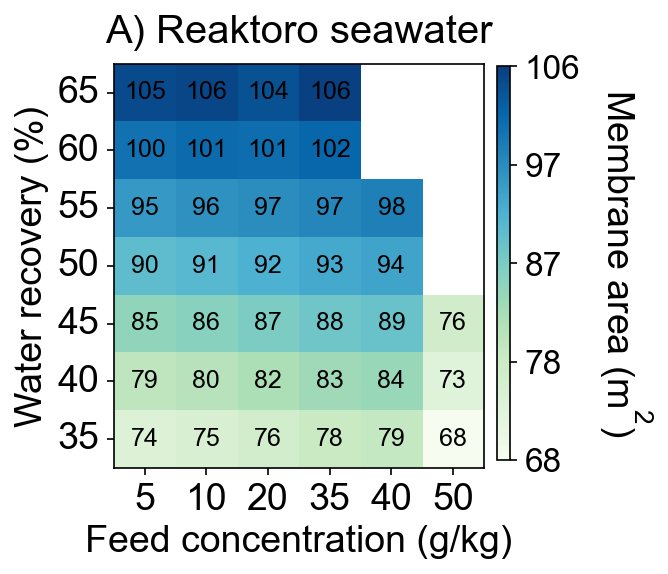

In [164]:
vmin = abs(np.min(data_HPRO_reaktoro["Membrane Area"]))
vmax = abs(np.max(data_HPRO_reaktoro["Membrane Area"]))

zticks = np.linspace(vmin,vmax, 5)
zticks = np.around(zticks, decimals=3)
figure = figureGenerator()
figure.init_figure(width=3.5, height=3.5)
figure.set_default_figure_settings(font_size=text_size_default-2, label_size=text_size_default)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")

figure.set_title("A) Reaktoro seawater",pad=10)
figure.plot_map(
    xdata=data_HPRO_reaktoro["# Feed Mass Frac"] *1000,
    ydata=data_HPRO_reaktoro["Water Recovery"]*100,
    zdata=data_HPRO_reaktoro["Membrane Area"],
    text=True,
    textfontsize= 12,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Membrane area (m$^{2}$)", zlabelpad=35)
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Feed concentration (g/kg)",
    ylabel="Water recovery (%)",
    fontsize=text_size_default
)

figure.save_fig(name="plot_reaktoro_mem_area_RO")

In [165]:
error_map = mcolors.LinearSegmentedColormap.from_list('Random gradient 8360', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%208360=006837-238443-41AB5D-78C679-ADDD8E-D9F0A3-FFEDA0-FED976
    (0.000, (0.000, 0.408, 0.216)),
    (0.143, (0.137, 0.518, 0.263)),
    (0.286, (0.255, 0.671, 0.365)),
    (0.429, (0.471, 0.776, 0.475)),
    (0.571, (0.678, 0.867, 0.557)),
    (0.714, (0.851, 0.941, 0.639)),
    (0.857, (1.000, 0.929, 0.627)),
    (1.000, (0.996, 0.851, 0.463))))

In [166]:
error_map = mcolors.LinearSegmentedColormap.from_list('Random gradient 8360', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%208360=FED976-FFEDA0-D9F0A3-ADDD8E-78C679-41AB5D-238443-006837-004529-006837-238443-41AB5D-78C679-ADDD8E-D9F0A3-FFEDA0-FED976
    (0.000, (0.996, 0.851, 0.463)),
    (0.063, (1.000, 0.929, 0.627)),
    (0.125, (0.851, 0.941, 0.639)),
    (0.188, (0.678, 0.867, 0.557)),
    (0.250, (0.471, 0.776, 0.475)),
    (0.313, (0.255, 0.671, 0.365)),
    (0.375, (0.137, 0.518, 0.263)),
    (0.438, (0.000, 0.408, 0.216)),
    (0.500, (0.000, 0.271, 0.161)),
    (0.563, (0.000, 0.408, 0.216)),
    (0.625, (0.137, 0.518, 0.263)),
    (0.688, (0.255, 0.671, 0.365)),
    (0.750, (0.471, 0.776, 0.475)),
    (0.813, (0.678, 0.867, 0.557)),
    (0.875, (0.851, 0.941, 0.639)),
    (0.938, (1.000, 0.929, 0.627)),
    (1.000, (0.996, 0.851, 0.463))))

In [167]:
def colormap_prop_error(data, error_data, xticks, yticks, z_format=0, i = "LCOW", title = "prop_name", letter = "A", file_name="file"):
    vmin = -10
    vmax = 10

    zticks = np.linspace(vmin, vmax, 5)
    zticks = np.around(zticks, decimals=z_format)
    figure = figureGenerator()
    figure.init_figure(width=3.5, height=3.5)
    figure.set_default_figure_settings(font_size=text_size_default-2, label_size=text_size_default)
    figure.colorMaps["color_map"] = matplotlib.colormaps.get_cmap(error_map)
    # figure.add_text(-0.75, 7.5, letter)
    figure.set_title(letter + ") " + title,pad=10)
    figure.plot_map(
        xdata=data["# Feed Mass Frac"] *1000,
        ydata=data["Water Recovery"] *100,
        zdata=error_data[i],
        text=True,
        sig_figs_text= 0,
        textfontsize= 12,
        text_color="black",
        build_map=True,
        vmin=vmin,
        vmax=vmax,
        fix_nans=True,
    )
    figure.add_colorbar(zticks=zticks, zformat=1, zlabel= "Relative difference (%)", zlabelpad=20)
    figure.set_axis_ticklabels(
        xticklabels=xticks,
        yticklabels=yticks,
        xformat=1,
        yformat=0,
        xlabel="Feed concentration (g/kg)",
        ylabel="Water recovery (%)",
        fontsize=text_size_default
    )
    # figure.add_text(-15,21,title)
    figure.save_fig(name=file_name)

(42,)
[ 5. 10. 20. 35. 40. 50.] [35. 40. 45. 50. 55. 60. 65.]
[0] [0] 1.4050015329354013 5.0 35.0
[0] [1] 1.358541079965018 5.0 40.0
[0] [2] 1.3096592965707738 5.0 45.0
[0] [3] 1.2579426948906998 5.0 50.0
[0] [4] 1.2025686495930312 5.0 55.00000000000001
[0] [5] 1.1423067081420892 5.0 60.0
[0] [6] 1.0753087030350919 5.0 65.0
[1] [0] 1.0393557893268932 10.0 35.0
[1] [1] 0.9976132848934666 10.0 40.0
[1] [2] 0.9506504637811171 10.0 45.0
[1] [3] 0.8983631243459477 10.0 50.0
[1] [4] 0.8402172007476197 10.0 55.00000000000001
[1] [5] 0.7752919699204448 10.0 60.0
[1] [6] 0.7022016078389939 10.0 65.0
[2] [0] 0.6799777009668869 20.0 35.0
[2] [1] 0.6606327846758122 20.0 40.0
[2] [2] 0.6365792751836176 20.0 45.0
[2] [3] 0.6093481749450365 20.0 50.0
[2] [4] 0.5805288487582672 20.0 55.00000000000001
[2] [5] 0.5521930640418486 20.0 60.0
[2] [6] 0.526973256833228 20.0 65.0
[3] [0] 0.705927574787443 35.0 35.0
[3] [1] 0.7158000887743454 35.0 40.0
[3] [2] 0.7221609234425357 35.0 45.0
[3] [3] 0.72497788089

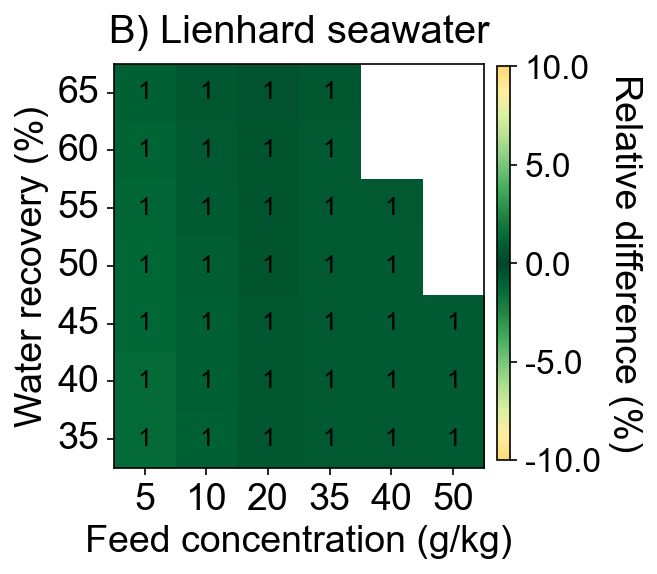

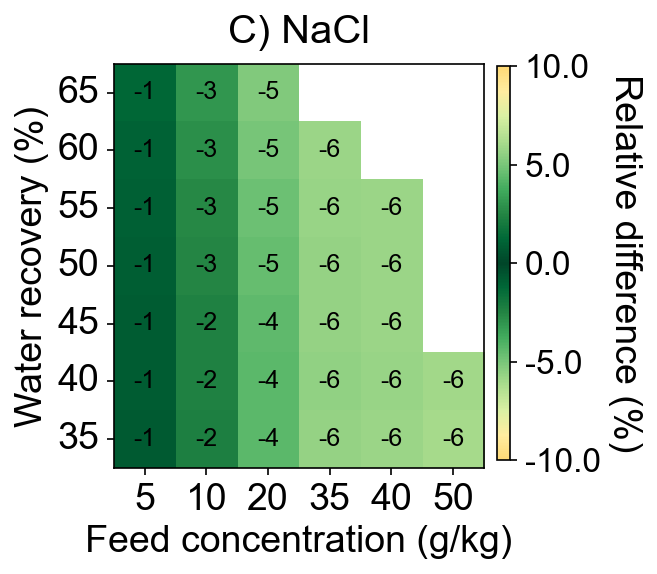

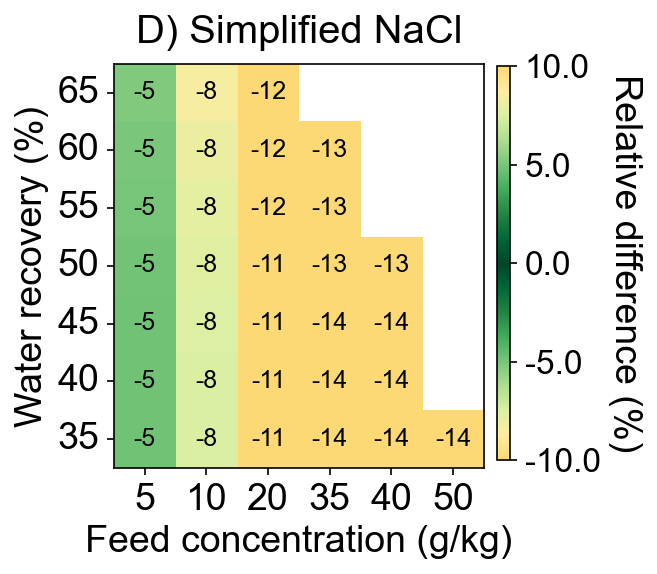

In [168]:
colormap_prop_error(data_HPRO_seawater, error_sea_HPRO, xticks, yticks, 1, "LCOW", "Lienhard seawater","B","plot_sea_LCOW_RO")
colormap_prop_error(data_HPRO_nacl, error_nacl_HPRO, xticks, yticks, 1, "LCOW", "NaCl", "C", "plot_nacl_LCOW_RO")
colormap_prop_error(data_HPRO_simple, error_simple_HPRO, xticks, yticks, 1, "LCOW", "Simplified NaCl", "D","plot_simple_LCOW_RO")

(42,)
[ 5. 10. 20. 35. 40. 50.] [35. 40. 45. 50. 55. 60. 65.]
[0] [0] 2.5077719590101104 5.0 35.0
[0] [1] 2.448312184672201 5.0 40.0
[0] [2] 2.3819296639541006 5.0 45.0
[0] [3] 2.3080382746974317 5.0 50.0
[0] [4] 2.2253550988536763 5.0 55.00000000000001
[0] [5] 2.1314270546396124 5.0 60.0
[0] [6] 2.022241771678483 5.0 65.0
[1] [0] 1.8250727070088315 10.0 35.0
[1] [1] 1.7705477407672365 10.0 40.0
[1] [2] 1.7040429308298033 10.0 45.0
[1] [3] 1.6250292720829154 10.0 50.0
[1] [4] 1.5320911398332857 10.0 55.00000000000001
[1] [5] 1.4222855462156259 10.0 60.0
[1] [6] 1.2910998948774275 10.0 65.0
[2] [0] 1.159787462942254 20.0 35.0
[2] [1] 1.1289879349799916 20.0 40.0
[2] [2] 1.086188393092845 20.0 45.0
[2] [3] 1.0327652834104872 20.0 50.0
[2] [4] 0.9695344639038497 20.0 55.00000000000001
[2] [5] 0.8970901532118691 20.0 60.0
[2] [6] 0.8151504509182611 20.0 65.0
[3] [0] 1.027109331800459 35.0 35.0
[3] [1] 1.0255396864221216 35.0 40.0
[3] [2] 1.012609016244779 35.0 45.0
[3] [3] 0.98705198479784

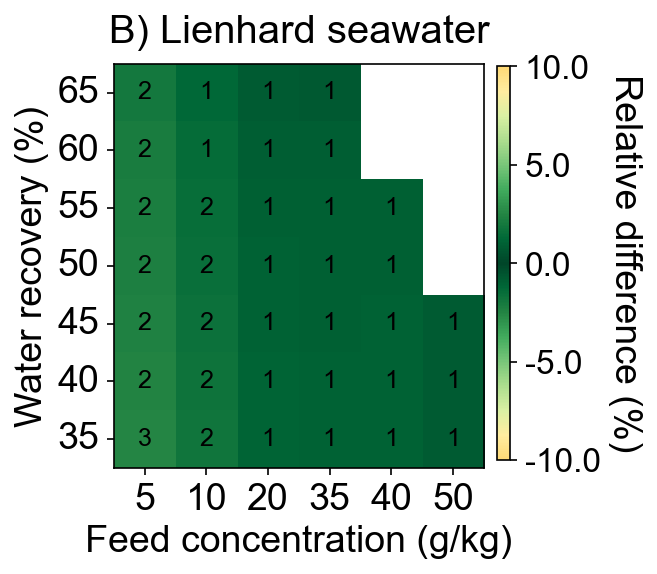

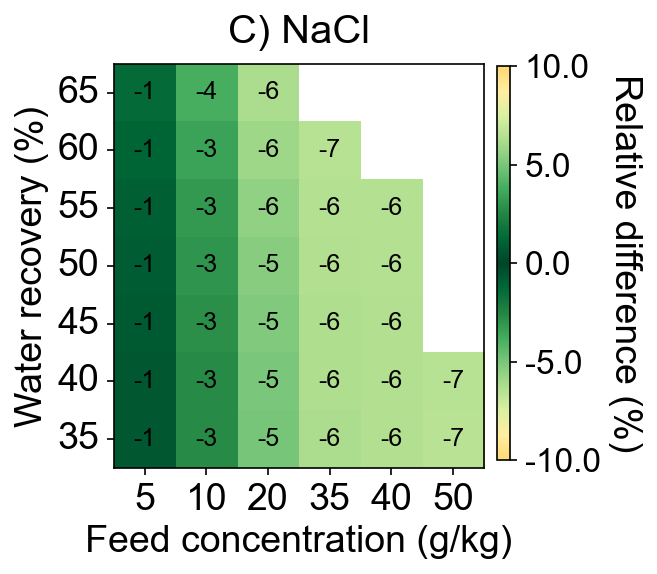

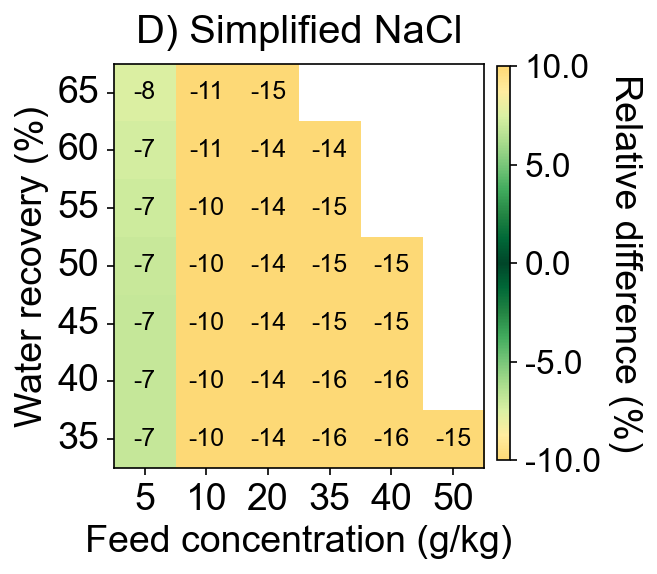

In [169]:
colormap_prop_error(data_HPRO_seawater, error_sea_HPRO, xticks, yticks, 0, "SEC", "Lienhard seawater","B","plot_sea_SEC_RO")
colormap_prop_error(data_HPRO_nacl, error_nacl_HPRO, xticks, yticks, 0, "SEC", "NaCl", "C","plot_nacl_SEC_RO")
colormap_prop_error(data_HPRO_simple, error_simple_HPRO, xticks, yticks, 0, "SEC", "Simplified NaCl", "D", "plot_simple_SEC_RO")

(42,)
[ 5. 10. 20. 35. 40. 50.] [35. 40. 45. 50. 55. 60. 65.]
[0] [0] 2.361251801581588 5.0 35.0
[0] [1] 2.310347828609556 5.0 40.0
[0] [2] 2.2517350055538934 5.0 45.0
[0] [3] 2.1850777925113625 5.0 50.0
[0] [4] 2.1094047697066998 5.0 55.00000000000001
[0] [5] 2.0224006642825465 5.0 60.0
[0] [6] 1.9202982581644799 5.0 65.0
[1] [0] 1.7000756285188268 10.0 35.0
[1] [1] 1.6509485299345976 10.0 40.0
[1] [2] 1.5897160984245584 10.0 45.0
[1] [3] 1.5159570959272795 10.0 50.0
[1] [4] 1.4283331025017942 10.0 55.00000000000001
[1] [5] 1.3240699813297556 10.0 60.0
[1] [6] 1.1987546809687772 10.0 65.0
[2] [0] 1.0204350880587711 20.0 35.0
[2] [1] 0.991945516898073 20.0 40.0
[2] [2] 0.9516568003890992 20.0 45.0
[2] [3] 0.9007838279504984 20.0 50.0
[2] [4] 0.8402018325936489 20.0 55.00000000000001
[2] [5] 0.770510929641394 20.0 60.0
[2] [6] 0.6913961545691111 20.0 65.0
[3] [0] 0.828044522281716 35.0 35.0
[3] [1] 0.8274895234090118 35.0 40.0
[3] [2] 0.8156879677029676 35.0 45.0
[3] [3] 0.7915012460456

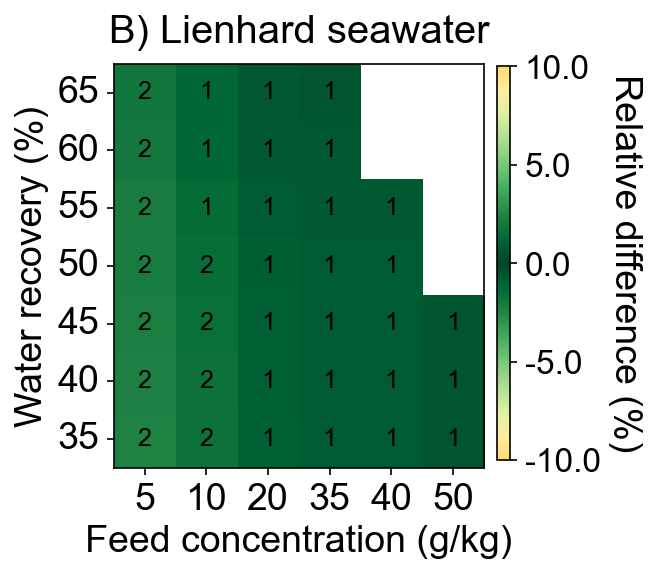

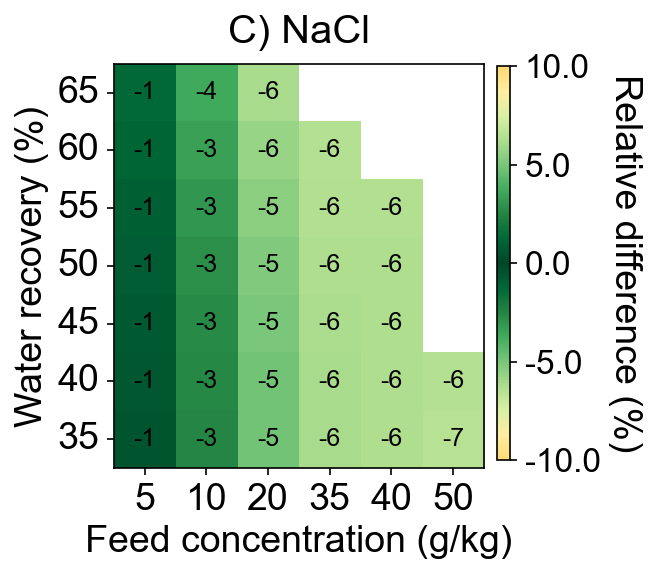

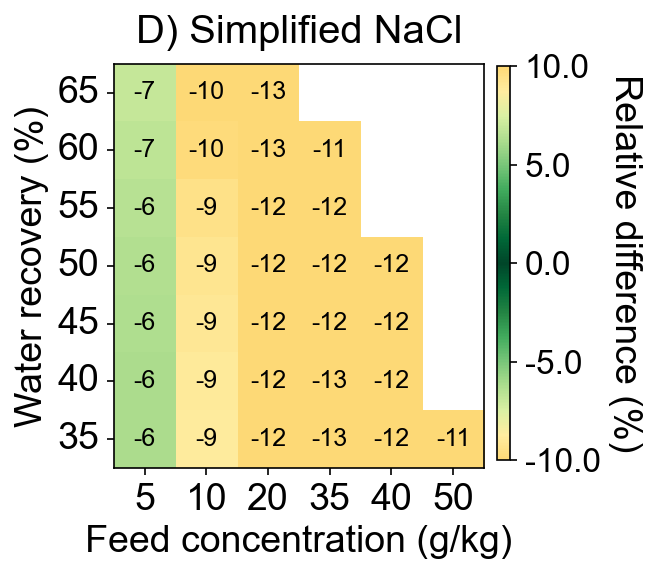

In [170]:

colormap_prop_error(data_HPRO_seawater, error_sea_HPRO, xticks, yticks, 1, "Operating Pressure", "Lienhard seawater", "B", "plot_sea_Op_P")
colormap_prop_error(data_HPRO_nacl, error_nacl_HPRO, xticks, yticks, 1, "Operating Pressure", "NaCl", "C","plot_nacl_Op_P")
colormap_prop_error(data_HPRO_simple, error_simple_HPRO, xticks, yticks, 1, "Operating Pressure", "Simplified NaCl", "D", "plot_simple_Op_P")

(42,)
[ 5. 10. 20. 35. 40. 50.] [35. 40. 45. 50. 55. 60. 65.]
[0] [0] 1.3114932181612218 5.0 35.0
[0] [1] 1.3554708750591975 5.0 40.0
[0] [2] 1.3991301723896177 5.0 45.0
[0] [3] 1.4427507618021678 5.0 50.0
[0] [4] 1.4868297572209022 5.0 55.00000000000001
[0] [5] 1.532386948392709 5.0 60.0
[0] [6] 1.581457084802052 5.0 65.0
[1] [0] 1.4263500978767913 10.0 35.0
[1] [1] 1.474115088346438 10.0 40.0
[1] [2] 1.5243661481582949 10.0 45.0
[1] [3] 1.5782611799724315 10.0 50.0
[1] [4] 1.6378579045661317 10.0 55.00000000000001
[1] [5] 1.7065969092526339 10.0 60.0
[1] [6] 1.7902633933310046 10.0 65.0
[2] [0] 1.7132792801212688 20.0 35.0
[2] [1] 1.775556306063808 20.0 40.0
[2] [2] 1.8460697954460012 20.0 45.0
[2] [3] 1.927383932818469 20.0 50.0
[2] [4] 2.02401335998264 20.0 55.00000000000001
[2] [5] 2.1446757823163036 20.0 60.0
[2] [6] 2.3089982696189058 20.0 65.0
[3] [0] 2.2238858184304617 35.0 35.0
[3] [1] 2.3157726971167185 35.0 40.0
[3] [2] 2.4301544943073496 35.0 45.0
[3] [3] 2.577917901902662

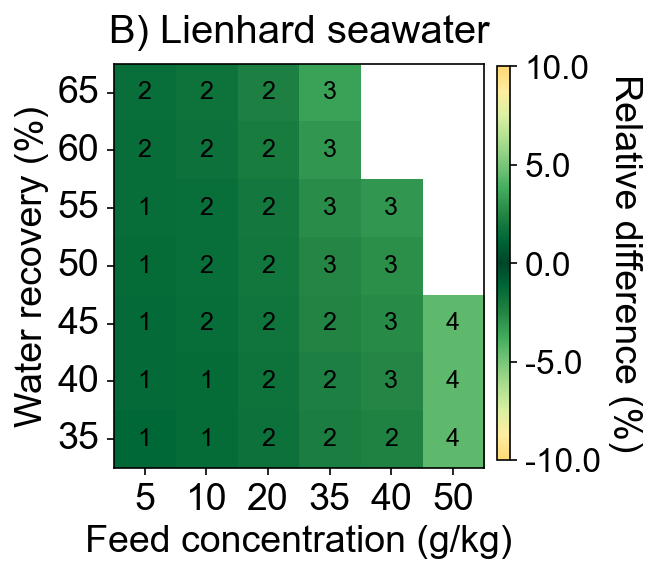

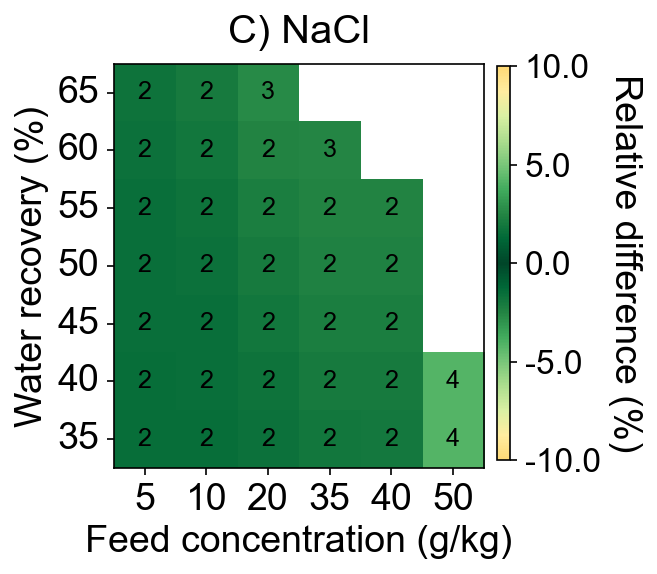

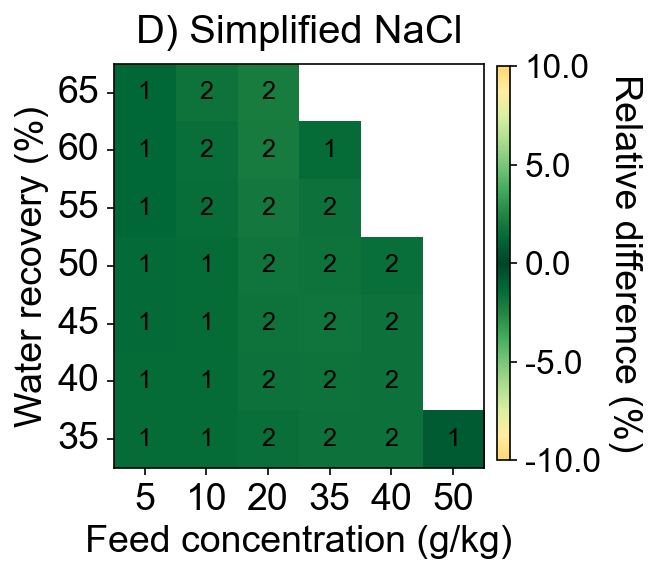

In [171]:
colormap_prop_error(data_HPRO_seawater, error_sea_HPRO, xticks, yticks, 2, "Membrane Area", "Lienhard seawater", "B", "plot_sea_mem_a")
colormap_prop_error(data_HPRO_nacl, error_nacl_HPRO, xticks, yticks, 2, "Membrane Area", "NaCl", "C","plot_nacl_mem_a")
colormap_prop_error(data_HPRO_simple, error_simple_HPRO, xticks, yticks, 2, "Membrane Area", "Simplified NaCl", "D", "plot_simple_mem_a")

In [172]:
sea_color = "#FFD046"
nacl_color = "#4A7B9D"
simple_color = "#467740"
reaktoro_color = "#C73E1D"

# title_size = 12
# plt.rcParams.update({'font.size': 12})

In [173]:
# data_RO_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_HPRO_sea_1D.csv')
# data_RO_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_HPRO_nacl_1D.csv')
# data_RO_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_HPRO_simple_1D.csv')
# data_RO_reaktoro = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_HPRO_reaktoro_1D.csv')

In [174]:
# fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*4, 2.5*4)) #figsize=(3.5, 2.5)

# axs[0,0].plot(data_RO_seawater["# Feed Mass Frac"]*1000, data_RO_seawater['LCOW'], color=sea_color)
# axs[0,0].plot(data_RO_nacl["# Feed Mass Frac"]*1000, data_RO_nacl['LCOW'], color=nacl_color)
# # axs[0,0].plot(data_RO_simple["# Feed Mass Frac"]*1000, data_RO_simple['LCOW'], color=simple_color)
# axs[0,0].plot(data_RO_reaktoro["# Feed Mass Frac"]*1000, data_RO_reaktoro['LCOW'], "-.", color=reaktoro_color)
# axs[0,0].set_xlabel("Feed concentration (g/kg)", fontsize=title_size)
# axs[0,0].set_ylabel("LCOW ($\$$/m$^3$)", fontsize=title_size)

# axs[0,1].plot(data_RO_seawater["# Feed Mass Frac"]*1000, data_RO_seawater['SEC'], color=sea_color)
# axs[0,1].plot(data_RO_nacl["# Feed Mass Frac"]*1000, data_RO_nacl['SEC'], color=nacl_color)
# # axs[0,1].plot(data_RO_simple["# Feed Mass Frac"]*1000, data_RO_simple['SEC'], color=simple_color)
# axs[0,1].plot(data_RO_reaktoro["# Feed Mass Frac"]*1000, data_RO_reaktoro['SEC'], "-.", color=reaktoro_color)
# axs[0,1].set_xlabel("Feed concentration (g/kg)", fontsize=title_size)
# axs[0,1].set_ylabel("SEC (kJ/m$^{3}$)", fontsize=title_size)

# axs[1,0].plot(data_RO_seawater["# Feed Mass Frac"]*1000, data_RO_seawater['Membrane Area'], color=sea_color)
# axs[1,0].plot(data_RO_nacl["# Feed Mass Frac"]*1000, data_RO_nacl['Membrane Area'], color=nacl_color)
# # axs[1,0].plot(data_RO_simple["# Feed Mass Frac"]*1000, data_RO_simple['Membrane Area'], color=simple_color)
# axs[1,0].plot(data_RO_reaktoro["# Feed Mass Frac"]*1000, data_RO_reaktoro['Membrane Area'], "-.", color=reaktoro_color)
# axs[1,0].set_xlabel("Feed concentration (g/kg)", fontsize=title_size)
# axs[1,0].set_ylabel("Membrane area (m$^{2}$)", fontsize=title_size)

# axs[1,1].plot(data_RO_seawater["# Feed Mass Frac"]*1000, data_RO_seawater['Operating Pressure']/1e5, color=sea_color)
# axs[1,1].plot(data_RO_nacl["# Feed Mass Frac"]*1000, data_RO_nacl['Operating Pressure']/1e5, color=nacl_color)
# # axs[1,1].plot(data_RO_simple["# Feed Mass Frac"]*1000, data_RO_simple['Operating Pressure']/1e5, color=simple_color)
# axs[1,1].plot(data_RO_reaktoro["# Feed Mass Frac"]*1000, data_RO_reaktoro['Operating Pressure']/1e5, "-.", color=reaktoro_color)

# axs[1,1].set_xlabel("Feed concentration (g/kg)", fontsize=title_size)
# axs[1,1].set_ylabel("Operating pressure (bar)", fontsize=title_size)

# axs[1,1].legend(["Seawater","NaCl","Reaktoro"], loc="lower right", fontsize=title_size)

# fig.savefig("RO_comparison")